In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import data

In [9]:
df=pd.read_csv(r"C:\Users\LENOVO\Desktop\Smart expenses\synthetic_expenses_500.csv")

In [10]:
df.head()

,Date,Description,Amount,Payment_Mode,Category
0,2025-01-10,Flight Booking,1282.73,UPI,Travel
1,2025-02-15,Big Bazaar Groceries,3211.70,UPI,Shopping
2,2025-02-12,Electronics Store,4289.68,UPI,Shopping
3,2025-01-30,Internet Bill,3514.77,UPI,Utilities
4,2025-01-18,Myntra Clothing,3892.02,Card,Shopping


In [11]:
df.tail()

,Date,Description,Amount,Payment_Mode,Category
495,2025-02-15,Myntra Clothing,2537.71,UPI,Shopping
496,2025-02-07,Swiggy Delivery,4011.61,UPI,Food
497,2025-02-28,Domino's Pizza,417.91,UPI,Food
498,2025-01-17,Spotify Premium,3876.28,Cash,Entertainment
499,2025-01-01,KFC,2400.15,UPI,Food


## Convert the uppercase into lowercase of description

In [12]:
df["Description"]=df["Description"].str.lower()

In [13]:
df.head()

,Date,Description,Amount,Payment_Mode,Category
0,2025-01-10,flight booking,1282.73,UPI,Travel
1,2025-02-15,big bazaar groceries,3211.70,UPI,Shopping
2,2025-02-12,electronics store,4289.68,UPI,Shopping
3,2025-01-30,internet bill,3514.77,UPI,Utilities
4,2025-01-18,myntra clothing,3892.02,Card,Shopping


In [14]:
df.tail()

,Date,Description,Amount,Payment_Mode,Category
495,2025-02-15,myntra clothing,2537.71,UPI,Shopping
496,2025-02-07,swiggy delivery,4011.61,UPI,Food
497,2025-02-28,domino's pizza,417.91,UPI,Food
498,2025-01-17,spotify premium,3876.28,Cash,Entertainment
499,2025-01-01,kfc,2400.15,UPI,Food


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [16]:
vectorizer = TfidfVectorizer()

In [17]:
x= vectorizer.fit_transform((df["Description"]))   # this convert text into numbers 

In [18]:
y=df["Category"]

## Split data into train and test 

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=42)

## Train model using naive bayes

In [21]:
from sklearn.naive_bayes import MultinomialNB

In [22]:
model = MultinomialNB()

In [23]:
model.fit(train_x,train_y)     # train the model

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


## Test the model

In [24]:
predi_y=model.predict(test_x)

In [25]:
from sklearn.metrics import accuracy_score , classification_report

In [26]:
print("Accuracy: ",accuracy_score(test_y,predi_y))

Accuracy:  1.0


In [27]:
print(classification_report(test_y, predi_y))

               precision    recall  f1-score   support

Entertainment       1.00      1.00      1.00        15
         Food       1.00      1.00      1.00        13
       Health       1.00      1.00      1.00        11
     Shopping       1.00      1.00      1.00        19
       Travel       1.00      1.00      1.00        22
    Utilities       1.00      1.00      1.00        20

     accuracy                           1.00       100
    macro avg       1.00      1.00      1.00       100
 weighted avg       1.00      1.00      1.00       100



## To predict new expenses

In [28]:
def predict_category(description):
    desc_tfidf = vectorizer.transform([description.lower()])
    category = model.predict(desc_tfidf)[0]
    return category

In [29]:
predict_category("Uber ₹250")

np.str_('Travel')

In [30]:
print(predict_category("Uber ₹250") )       #should return travel
print(predict_category("Domino's pizza") )  #should return food

Travel
Food


## Visulize the expenses

In [31]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [33]:
# Total spend per category

category_spend = df.groupby("Category")["Amount"].sum()

In [34]:
category_spend

Category
Entertainment    231743.98
Food             232377.69
Health           197843.15
Shopping         224754.92
Travel           196297.35
Utilities        198820.01
Name: Amount, dtype: float64

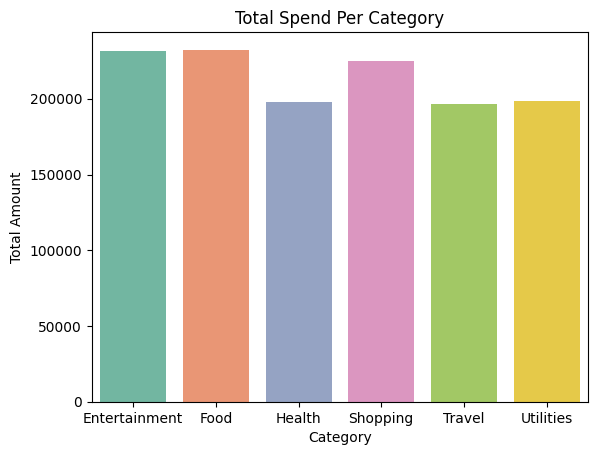

In [35]:
plt.Figure(figsize=(8,5))
sns.barplot(x=category_spend.index,y=category_spend.values, palette="Set2")
plt.title("Total Spend Per Category")
plt.ylabel("Total Amount")
plt.show()

In [36]:
# Payment mode usage

payment_count = df["Payment_Mode"].value_counts()
payment_count

Payment_Mode
NetBanking    129
UPI           127
Card          125
Cash          119
Name: count, dtype: int64

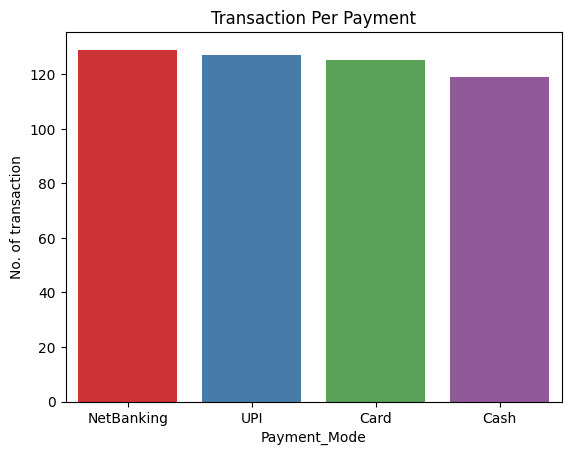

In [37]:
plt.Figure(figsize=(6,4))
sns.barplot(x=payment_count.index, y=payment_count.values, palette="Set1")
plt.title("Transaction Per Payment")
plt.ylabel("No. of transaction")
plt.show()

## Deploy on Streamlit

In [38]:
import pickle 
with open("expense_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(vectorizer, f)

print("✅ Model & vectorizer saved successfully!")

✅ Model & vectorizer saved successfully!
